TUAZON, FRANCESCA MARIE A. (BCS34)

# Task 1: Global and Local Threshold

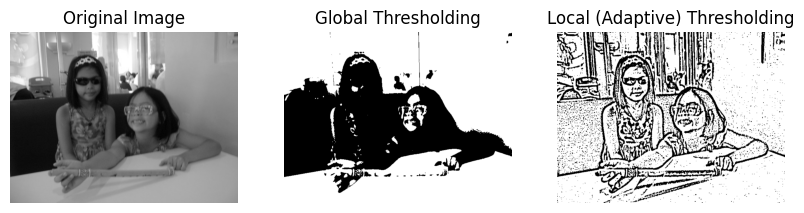

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
  # Load the image in grayscale
  image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

  # Global Thresholding (Otsu's Method)
  _, global_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Local (Adaptive) Thresholding
  local_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
  cv2.THRESH_BINARY, 11, 2)

  # Display results
  titles = ['Original Image', 'Global Thresholding', 'Local (Adaptive) Thresholding']
  images = [image, global_thresh, local_thresh]

  plt.figure(figsize=(10, 5))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

  plt.show()

if __name__ == '__main__':
  main()

# Task 2: Edge Detection

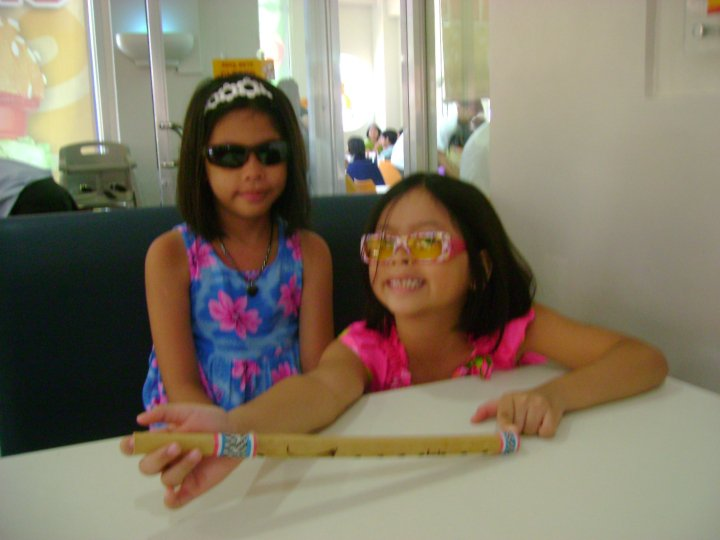

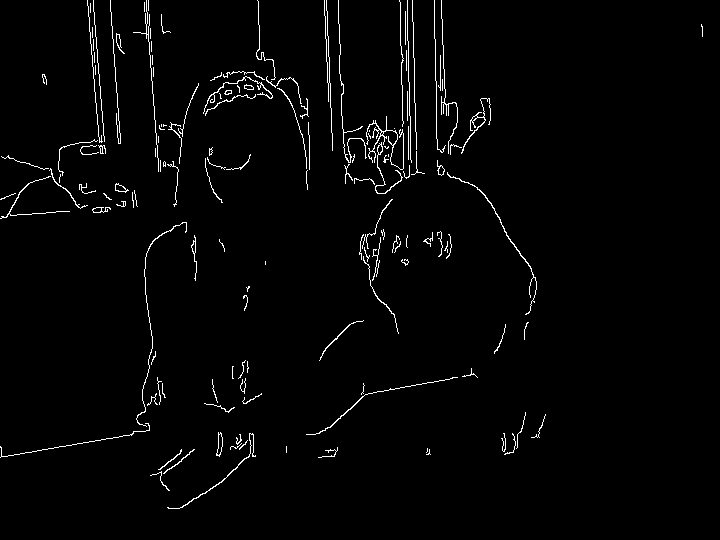

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


def edge_segmentation(image_path):
  # Load the image
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Canny Edge Detection
  edges = cv2.Canny(gray, 100, 200)

  # Display the original and edge-detected images
  cv2_imshow(image)  # Pass only the image to cv2_imshow
  cv2_imshow(edges)  # Pass only the edges image to cv2_imshow


  cv2.waitKey(0)
  cv2.destroyAllWindows()

# Example usage
image_path = 'image.jpg'
edge_segmentation(image_path)

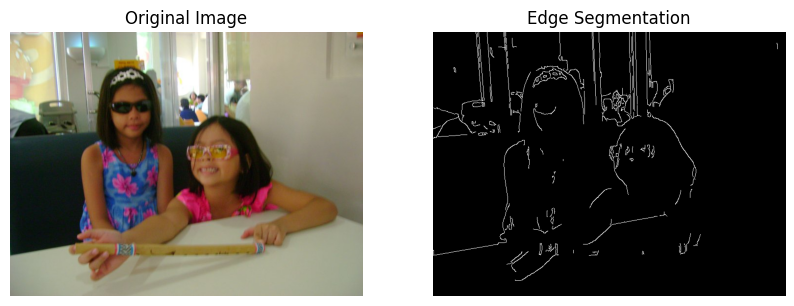

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_segmentation(image_path):
  # Load the image
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Canny Edge Detection
  edges = cv2.Canny(gray, 100, 200)

  # Display the original and edge-detected images horizontally with labels using Matplotlib
  plt.figure(figsize=(10, 5))  # Adjust figure size as needed

  plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Convert from BGR to RGB for Matplotlib
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
  plt.imshow(edges, cmap='gray')  # Use cmap='gray' for grayscale edge image
  plt.title('Edge Segmentation')
  plt.axis('off')

  plt.show()  # Display the plot

  cv2.waitKey(0)
  cv2.destroyAllWindows()

# Example usage
image_path = 'image.jpg'
edge_segmentation(image_path)

# Task 3: Region based segmentation

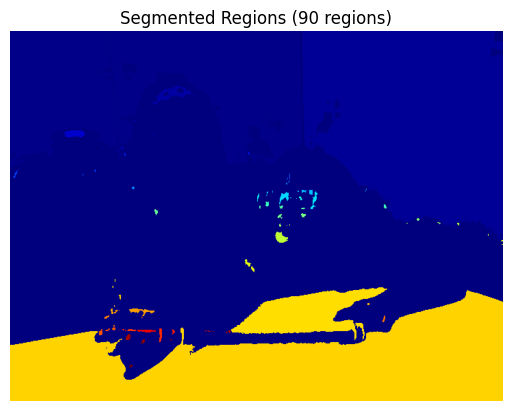

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_based_segmentation(image_path):
  image = cv2.imread(image_path, 0)
  _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

  # Find connected components
  num_labels, labels = cv2.connectedComponents(binary)

  plt.imshow(labels, cmap='jet')
  plt.title(f'Segmented Regions ({num_labels} regions)')
  plt.axis('off')
  plt.show()

# Example usage
image_path = 'image.jpg'  # Change this to your image path
region_based_segmentation(image_path)

# Task 4: Reflection
**1. What is the error on the presented codes? If any. How did you correct it?**

For the first and third given, there were no errors found and the results are displayed as is.

For the second given, cv2_imshow wasn't read by Google Colab so I imported the function. Afterwards, a TypeError was thrown due to how cv2_imshow() takes 1 positional argument but 2 were given--to correct this,window name arguments were removed as this aligns with how the function is intended to be used in Google Colab. In addition, the second variation of the code output shows how we can use an alternative method to correct the code which is to remove cv2_imshow entirely and replace it with matplotlib when it comes to displaying the figures. Through this method, we are able to keep the labels in the figures, similar to the other examples.

**2. Explain comprehensively, the difference between local and global threshold. Cite 2 real-life
examples for each.**

Global and local thresholding offer distinct approaches to image manipulation with various applications in art. ***Global thresholding*** employs a *single threshold value* across the entire image, making it ideal for **creating high-contrast images** and **silhouettes**. This technique simplifies an image to black and white, emphasizing shapes and outlines, similar to using high-contrast film in traditional photography. In digital art or graphic design, global thresholding effectively isolates subjects for further editing or bold visual effects. Conversely, ***local thresholding*** calculates the threshold *dynamically* for each pixel based on its local neighborhood. This adaptability makes it suitable for **enhancing textures** and **creating halftone patterns**. By varying the threshold across the image, local thresholding reveals fine details and creates subtle tonal variations, enhancing realism or achieving stylized effects in digital paintings and photo editing.

In essence, global thresholding offers robust, high-contrast results, while local thresholding provides provides refined details and subtle gradations, offering artists diverse options for creative expression.

**3. Which do you think is much better, region-based or edge, segmentation? Defend your answer.**

Region-based and edge-based segmentation are two fundamental approaches in image analysis. Edge-based segmentation detects object boundaries by identifying sharp changes in pixel intensity. This is useful for applications like object detection where precise outlines are important. Region-based segmentation groups similar pixels based on shared characteristics like color or texture. This is beneficial for tasks like image editing or medical imaging where the internal properties of regions matter more than exact boundaries. Edge-based methods can be sensitive to noise, while region-based methods can be computationally demanding.

In the context of art, edge-based segmentation would be better, considering the rise in digital art creation and manipulation. This method excels at defining clear boundaries and contours, which are often desirable in digital art styles that emphasize sharp lines and graphic elements. The ability to precisely isolate objects or regions based on edges facilitates tasks like selective editing, compositing, and creating stylized effects in softwares like Adobe Photoshop. While region-based segmentation is still valuable for certain artistic applications, such as texture enhancement or color-based manipulations—often used as touch-up processes like overlays in photo editing—edge-based segmentation is often considered more fundamental as it forms the basis for many digital artworks.

 However, if we are generally speaking, the best choice would still depend on the specific task and the image characteristics.